In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
%matplotlib inline

In [15]:
#read in data
red = pd.read_csv('winequality-red.csv', ';')
red = pd.DataFrame(red)
#add type column
for wine in red:
    red['type'] = 'red'
    
white = pd.read_csv('winequality-white.csv', ';')
white = pd.DataFrame(white)

for wine in white:
    white['type']  ='white'
#combine data sets into one data frame
wines = red.append(white)

wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


### Choose one variable and plot that variable four different ways.
Variable: pH

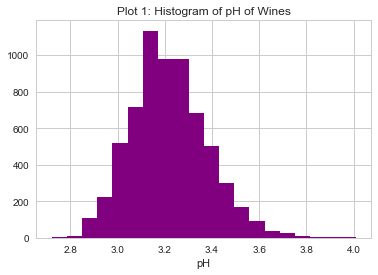

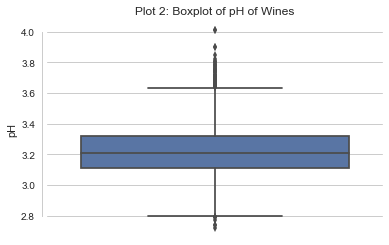

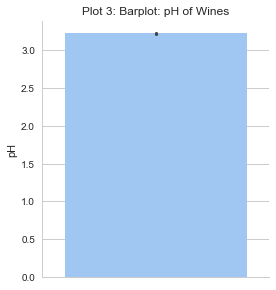

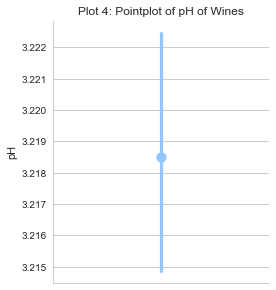

In [100]:
#histogram
plt.hist(wines['pH'], bins=20, color='purple')
plt.title('Plot 1: Histogram of pH of Wines')
plt.xlabel('pH')
plt.show()

#boxplot
sns.boxplot(y='pH',
            data=wines)
plt.title('Plot 2: Boxplot of pH of Wines')
sns.despine(offset=5, trim=True)
plt.show()

#barplot
g=sns.factorplot(y='pH', 
                 data=wines, 
                 kind='bar', 
                 palette='pastel', 
                 ci=95)
plt.title('Plot 3: Barplot: pH of Wines')
plt.show()

#pointplot
g = sns.factorplot(y='pH',  
                   data=wines, 
                   kind='point', 
                   ci=95, 
                   dodge=True, 
                   join=False, 
                   palette='pastel')
plt.title('Plot 4: Pointplot of pH of Wines')
plt.show()


#### Pros and Cons
__Histogram:__
Pros: Shows that the pH is approximately normally distributed, centralized around a pH of 3.2.

Cons: The data does not clearly show the mean value of pH, and only provides an approximation of how wines are distributed.

__Box Plot:__
Pros: Clearly shows that the pH of wines are closely centered around 3.2, with outliers at higher pH values.  

Cons: There are many outliers, creating a smear of points.

__Bar Plot:__
Pros: Shows that the average pH of the wines is over 3, and there is a small standard deviation in values.

Cons: It is hard to determine the actual mean pH of the wines, and the standard deviation is so small that it is essentially zero.

__Point Plot:__
Pros: Clearly shows the mean pH of the wines, and the confidence interval looks large.

Cons: For this graph, there are is only one point on the plot, and the y-axis is very zoomed in.

### Choose two continuous variables, and plot them three different ways.
Variables: alcohol and pH

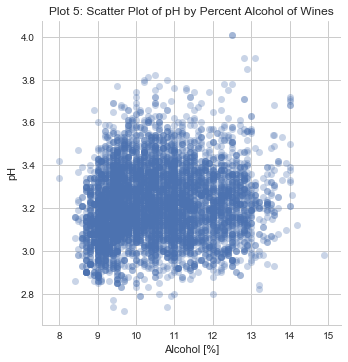

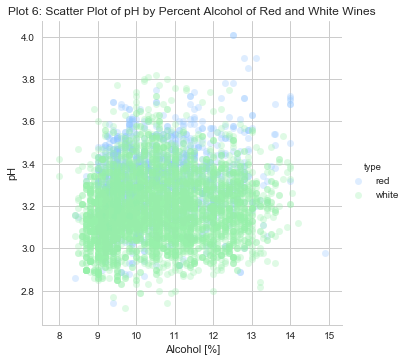

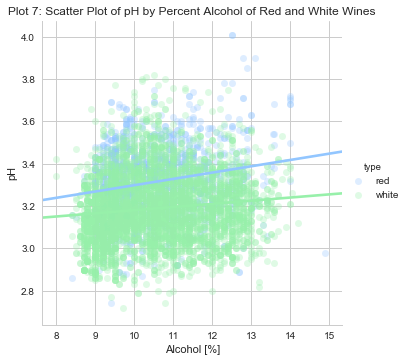

In [92]:
#scatter plot together
g = sns.lmplot(x='alcohol', 
               y='pH', 
               data=wines, 
               palette='pastel',
              fit_reg=False,
              scatter_kws={'alpha':0.3})
g.set_ylabels('pH')
g.set_xlabels('Alcohol [%]')
plt.title('Plot 5: Scatter Plot of pH by Percent Alcohol of Wines')
plt.show()

#scatter plot of red and white wines
g = sns.lmplot(x='alcohol', 
               y='pH', 
               hue='type', 
               data=wines, 
               palette='pastel',
              fit_reg=False,
              scatter_kws={'alpha':0.3})
g.set_ylabels('pH')
g.set_xlabels('Alcohol [%]')
plt.title('Plot 6: Scatter Plot of pH by Percent Alcohol of Red and White Wines')
plt.show()

g = sns.lmplot(x='alcohol', 
               y='pH', 
               hue='type', 
               data=wines, 
               palette='pastel',
              fit_reg=True,
               ci=False,
              scatter_kws={'alpha':0.3})
g.set_ylabels('pH')
g.set_xlabels('Alcohol [%]')
plt.title('Plot 7: Scatter Plot of pH by Percent Alcohol of Red and White Wines')
plt.show()

#### Pros and Cons
__Scatter Plot:__
Pros: Shows the spread of both variables, from a pH of 2.6 to 4 and percent alcohol from 8% to 15%.

Cons: Just looks like one big blob of points and doesn't provide much information about the relationship.

__Scatter Plot by Type:__
Pros: Shows that reds have a higher pH and slightly higher percent alcohol than whites.

Cons: Again, mostly a big blob, just now has two different colors. 

__Scatter Plot with Regression:__
Pros: Clearly shows the trend of the correlation with the regression lines. Shows that there is a different trend with white and red wines.

Cons: Clearly there is some spread in this data, but this is not shown with the regression line.  Confidence intervals would help delineate confidence in this regression.

### Choose one continuous variable and one categorical variable, and plot them six different ways.
Variables: pH and Type

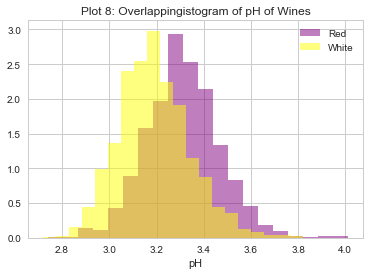

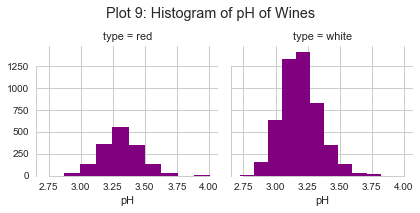

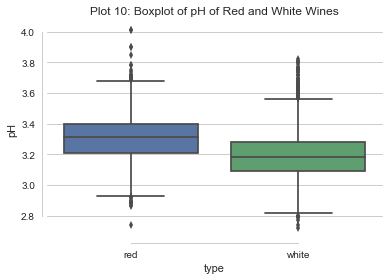

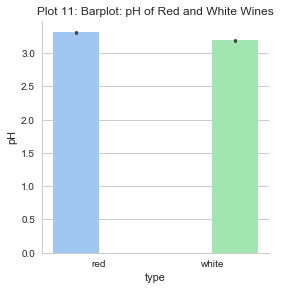

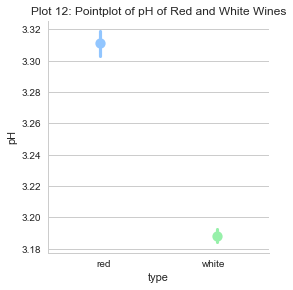

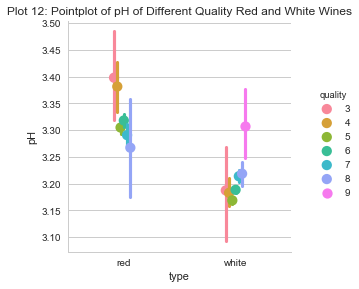

In [106]:
#overlapping histogram
plt.hist(red['pH'], bins=20, color='purple', normed=True, alpha=0.5, label='Red')
plt.hist(white['pH'], bins=20, color='yellow', normed=True, alpha=0.5, label='White')
plt.title('Plot 8: Overlappingistogram of pH of Wines')
plt.xlabel('pH')
plt.legend()
plt.show()

#side by side histogram
g = sns.FacetGrid(wines, col='type')
g.map(plt.hist, 'pH', color='purple', lw=0)
plt.subplots_adjust(top=0.8)
plt.suptitle('Plot 9: Histogram of pH of Wines')
g.set_axis_labels('pH')
sns.despine(trim=True)
plt.show()

#boxplot
sns.boxplot(x='type', 
            y='pH',
            data=wines)
plt.title('Plot 10: Boxplot of pH of Red and White Wines')
sns.despine(offset=5, trim=True)
plt.show()

#barplot
g=sns.factorplot(x='type', 
                 y='pH', 
                 hue='type', 
                 data=wines, 
                 kind='bar', 
                 palette='pastel', 
                 ci=95)
plt.title('Plot 11: Barplot: pH of Red and White Wines')
plt.show()

#pointplot
g = sns.factorplot(x='type', 
                   y='pH', 
                   hue='type', 
                   data=wines, 
                   kind='point', 
                   ci=95, 
                   dodge=True, 
                   join=False, 
                   palette='pastel')
plt.title('Plot 12: Pointplot of pH of Red and White Wines')
plt.show()

#pointplot for wine scores
g = sns.factorplot(x='type', 
                   y='pH', 
                   hue='quality', 
                   data=wines, 
                   kind='point', 
                   ci=95, 
                   dodge=True, 
                   join=False)
plt.title('Plot 12: Pointplot of pH of Different Quality Red and White Wines')
plt.show()


#### Pros and Cons
__Normed Overlapping Histogram:__
Pros: Shows that red wines have a higher pH than white wines. Both are approximately normally distributed.

Cons: Exact information about both cannot be easily read from the graph. 

__Histogram:__
Pros: Shows that there are more white wines in the sample than reds, and that red wines have a slightly higher pH than whites do.

Cons: The data does not clearly show the mean value of pH for either wine, and only provides an approximation of how wines are distributed.

__Box Plot:__
Pros: Clearly shows that red wines have a higher pH than whites and have more outliers with higher pHs.  

Cons: There are many outliers, especially for white wines with high pHs, creating a smear of points.

__Bar Plot:__
Pros: Shows that the average pH of both wines is over 3, and there is a small standard deviation in values.

Cons: It is hard to distinguish the values from one another, as both appear to be above 3.

__Point Plot:__
Pros: Clearly shows that the pH of red wine is higher than that of white wine, and there is not a large variation in pH for either wine.

Cons: For this graph, there are only 2 points on the plot, leaving a lot of white space

__Point Plot by Quality:__
Pros: Gives more detail as to the pH levels of different quality wines.  Shows that lower pH red wines have a higher quality and higher pH white wines have a higher quality.

Cons: Points are huddled closely together, so with the exception of the highs and lows, it is hard to tell information about the different qualities.

### Challenge: Master Plot of Probability Distributions, Master Plot of Bivariate relationships, and Master Plot of Distributions/relationship variation
Note: I'm not confident in these.

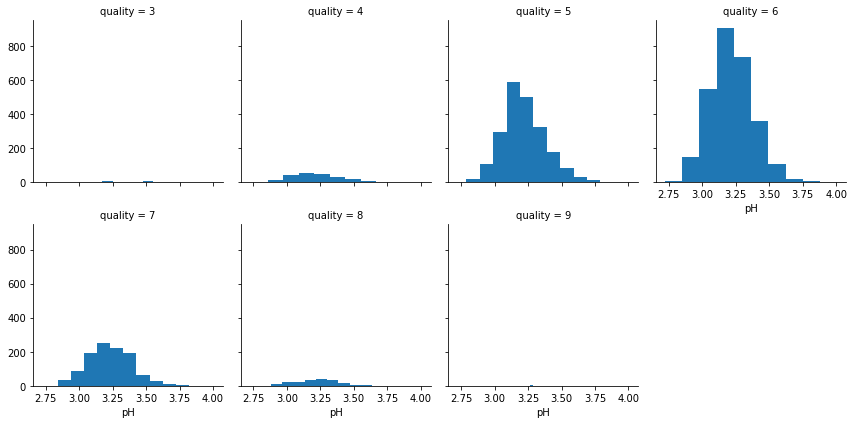

In [23]:
g = sns.FacetGrid(wines, col='quality', col_wrap=4)
g = g.map(plt.hist, 'pH')

All qualities of wines have a mean pH of around 3.25, and most wines are quality level 6. 

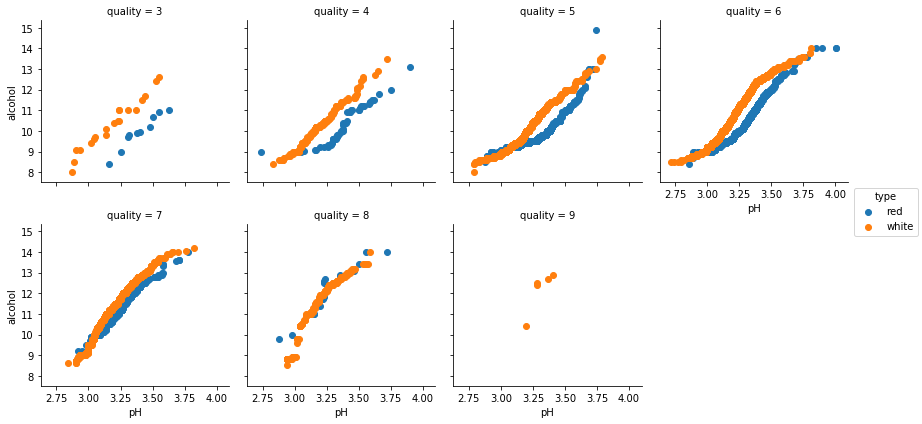

In [27]:
#defining qqplots
def qqplot(x, y, **kwargs):
    _, xr = stats.probplot(x, fit=False)
    _, yr = stats.probplot(y, fit=False)
    plt.scatter(xr, yr, **kwargs)
g = sns.FacetGrid(wines, col='quality', col_wrap=4, hue='type')
g = (g.map(qqplot, 'pH', 'alcohol').add_legend())

The relationship between pH and alcohol is somewhat skewed, as demonstrated by the non-45 degree angle line formed by the values of pH and alcohol. 

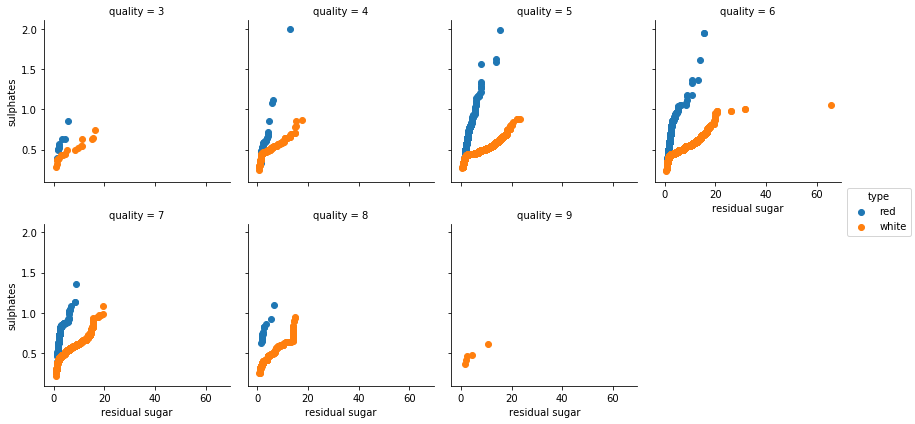

In [32]:
#master plot of residual sugar and sulphates by wine quality
g = sns.FacetGrid(wines, col='quality', col_wrap=4, hue='type')
g = (g.map(qqplot, 'residual sugar', 'sulphates').add_legend())

The relationship between residual sugar and sulphates is non-normal with a lower distribution of residual sugar and larger spread of sulphates.

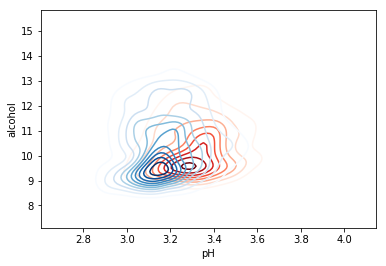

In [17]:
#Kdeplot = fit and plot a bivariate kernel density estimate
ax = sns.kdeplot(red['pH'], red['alcohol'], cmap='Reds')
ax = sns.kdeplot(white['pH'], white['alcohol'], cmap='Blues')

pH and alcohol distributions are close in terms of alcohol content, whereas white wines have a lower pH than red wines.